# Brett Pfliger

## How did the Buffalo Sabers and Vancouver Canucks play before and after their Covid-19 outbreaks and is there any correlation?

I am a huge hockey fan and am curious to see how the Buffalo Sabers and Vancouver Canucks played after their Covid-19 outbreaks. Both of these teams experianced the most time off due to their outbreaks compared to many other teams and I want to see if that resulted in them playing worse when coming back. 

In [168]:
import pandas as pd

In [169]:
# Imported pandas to perform EDA

In [170]:
pd.__version__

'1.3.3'

In [171]:
# Checking pandas version

In [172]:
pwd

'/Users/brettpfliger/school/year3/project-group23-project/notebooks'

In [173]:
# Printing Working Directory 

In [174]:
import numpy as np

In [175]:
import pandas as pd

In [176]:
import seaborn as sns

In [177]:
# Importing numpy, pandas, and seaborn

In [178]:
pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,Limited ReportFull Report,40.966667,32,50,39.02,17,19,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,Limited ReportFull Report,47.416667,43,37,53.75,25,17,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,Limited ReportFull Report,47.416667,37,43,46.25,17,25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,Limited ReportFull Report,44.483333,43,35,55.13,30,18,62.50,24.00,94.44,1.184


In [179]:
# Importing our csv data set of every game played in the 2020-21 NHL regular season

In [180]:
data = pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
print(data)

                                         Game                 Team  \
0      2021-01-13 - Blackhawks 1, Lightning 5   Chicago Blackhawks   
1      2021-01-13 - Blackhawks 1, Lightning 5  Tampa Bay Lightning   
2           2021-01-13 - Blues 4, Avalanche 1   Colorado Avalanche   
3           2021-01-13 - Blues 4, Avalanche 1       St Louis Blues   
4     2021-01-13 - Canadiens 4, Maple Leafs 5   Montreal Canadiens   
...                                       ...                  ...   
1731         2021-05-16 - Flames 6, Canucks 5    Vancouver Canucks   
1732         2021-05-18 - Flames 2, Canucks 4       Calgary Flames   
1733         2021-05-18 - Flames 2, Canucks 4    Vancouver Canucks   
1734         2021-05-19 - Canucks 2, Flames 6       Calgary Flames   
1735         2021-05-19 - Canucks 2, Flames 6    Vancouver Canucks   

                     Unnamed: 2        TOI  CF  CA    CF%  SCF  SCA   SCF%  \
0     Limited ReportFull Report  45.583333  33  34  49.25   19   24  44.19   
1  

In [181]:
data.head()

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991


In [182]:
data.shape

(1736, 13)

In [183]:
df = data.drop(columns =['CF','CA','SCF','SCA','PDO', 'Unnamed: 2'])

In [184]:
df.head()

,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,45.583333,49.25,44.19,0.00,86.36
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,45.583333,50.75,55.81,13.64,100.00
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,50.683333,50.57,33.33,0.00,85.19
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,50.683333,49.43,66.67,14.81,100.00
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,48.600000,47.47,45.45,9.09,90.00


In [185]:
# In this step, I dropped the columns of 'CF', 'CA', 'SCF', 'SCA', 'PDO', 'Unnamed: 2' as we don't need them

In [186]:
df.shape

(1736, 7)

In [187]:
Sabres = df.drop(data[data.Team.isin(["Arizona Coyotes", "Vancouver Canucks",  "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks"])].index)




In [188]:
Sabres.shape

(56, 7)

In [189]:
# In this step, I dropped all of the teams except the Buffalo Sabres to create its own dataframe

In [190]:
Canucks = df.drop(data[data.Team.isin(["Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks"])].index)
Canucks.shape

(56, 7)

In [191]:
# In this step, I dropped all the teams except the Vancouver Canucks to create its own dataframe

In [192]:
Canucks1 = Canucks.reset_index()
Canucks1

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,7,"2021-01-13 - Canucks 5, Oilers 3",Vancouver Canucks,47.583333,58.24,54.17,16.13,88.00
1,15,"2021-01-14 - Canucks 2, Oilers 5",Vancouver Canucks,44.550000,55.86,54.72,6.67,91.67
2,47,"2021-01-16 - Canucks 0, Flames 3",Vancouver Canucks,45.650000,45.68,38.24,0.00,100.00
3,71,"2021-01-18 - Canucks 2, Flames 5",Vancouver Canucks,36.966667,43.55,28.57,6.67,90.00
4,99,"2021-01-20 - Canadiens 5, Canucks 6",Vancouver Canucks,50.333333,43.48,43.75,10.00,85.19
5,111,"2021-01-21 - Canadiens 7, Canucks 3",Vancouver Canucks,31.783333,30.65,32.14,20.00,82.61
6,137,"2021-01-23 - Canadiens 5, Canucks 2",Vancouver Canucks,47.416667,42.22,38.64,10.53,85.71
7,169,"2021-01-25 - Senators 1, Canucks 7",Vancouver Canucks,46.850000,47.25,48.89,22.22,96.30
8,199,"2021-01-27 - Senators 1, Canucks 5",Vancouver Canucks,44.750000,53.68,62.75,14.29,100.00
9,223,"2021-01-28 - Senators 1, Canucks 4",Vancouver Canucks,45.066667,43.88,52.50,13.64,96.55


In [193]:
# Reset index to make it easier to drop games that arn't needed 

In [194]:
Canucks2 = Canucks1.drop(Canucks1.index[0:27]).drop(Canucks1.index[47:56])
Canucks2

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
27,717,"2021-03-06 - Maple Leafs 2, Canucks 4",Vancouver Canucks,54.316667,42.48,41.51,8.00,94.59
28,745,"2021-03-08 - Canadiens 1, Canucks 2",Vancouver Canucks,51.166667,39.58,40.00,0.00,100.00
29,773,"2021-03-10 - Canadiens 5, Canucks 1",Vancouver Canucks,45.133333,34.69,24.00,0.00,89.19
30,825,"2021-03-13 - Oilers 1, Canucks 2",Vancouver Canucks,50.100000,46.81,41.03,5.00,100.00
31,855,"2021-03-15 - Canucks 3, Senators 2",Vancouver Canucks,47.183333,40.35,40.32,7.69,97.62
32,885,"2021-03-17 - Canucks 3, Senators 2",Vancouver Canucks,52.000000,38.68,37.50,7.69,92.31
33,915,"2021-03-19 - Canucks 3, Canadiens 2",Vancouver Canucks,50.000000,46.15,42.86,8.00,100.00
34,929,"2021-03-20 - Canucks 4, Canadiens 5",Vancouver Canucks,56.850000,32.04,22.92,23.08,91.18
35,968,"2021-03-22 - Jets 4, Canucks 0",Vancouver Canucks,56.000000,47.79,42.86,0.00,85.71
36,988,"2021-03-24 - Jets 5, Canucks 1",Vancouver Canucks,48.766667,62.11,62.22,3.13,91.30


In [195]:
Canucks2.shape

(20, 8)

In [196]:
# Dropped all of the games that arn't needed. Know we have Vancouvers 10 games before and 10 games after their outbreak

In [197]:
Canucks3 = Canucks2.reset_index()
Canucks3 = Canucks3.drop(columns =['level_0'])
Canucks3

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,717,"2021-03-06 - Maple Leafs 2, Canucks 4",Vancouver Canucks,54.316667,42.48,41.51,8.00,94.59
1,745,"2021-03-08 - Canadiens 1, Canucks 2",Vancouver Canucks,51.166667,39.58,40.00,0.00,100.00
2,773,"2021-03-10 - Canadiens 5, Canucks 1",Vancouver Canucks,45.133333,34.69,24.00,0.00,89.19
3,825,"2021-03-13 - Oilers 1, Canucks 2",Vancouver Canucks,50.100000,46.81,41.03,5.00,100.00
4,855,"2021-03-15 - Canucks 3, Senators 2",Vancouver Canucks,47.183333,40.35,40.32,7.69,97.62
5,885,"2021-03-17 - Canucks 3, Senators 2",Vancouver Canucks,52.000000,38.68,37.50,7.69,92.31
6,915,"2021-03-19 - Canucks 3, Canadiens 2",Vancouver Canucks,50.000000,46.15,42.86,8.00,100.00
7,929,"2021-03-20 - Canucks 4, Canadiens 5",Vancouver Canucks,56.850000,32.04,22.92,23.08,91.18
8,968,"2021-03-22 - Jets 4, Canucks 0",Vancouver Canucks,56.000000,47.79,42.86,0.00,85.71
9,988,"2021-03-24 - Jets 5, Canucks 1",Vancouver Canucks,48.766667,62.11,62.22,3.13,91.30


In [198]:
#Reset index to make it easier to analyze Vancouvers Games and droped the column it added of 'level_0'

In [199]:
CanucksBefore = Canucks3.drop(Canucks3.index[10:])
CanucksBefore

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,717,"2021-03-06 - Maple Leafs 2, Canucks 4",Vancouver Canucks,54.316667,42.48,41.51,8.00,94.59
1,745,"2021-03-08 - Canadiens 1, Canucks 2",Vancouver Canucks,51.166667,39.58,40.00,0.00,100.00
2,773,"2021-03-10 - Canadiens 5, Canucks 1",Vancouver Canucks,45.133333,34.69,24.00,0.00,89.19
3,825,"2021-03-13 - Oilers 1, Canucks 2",Vancouver Canucks,50.100000,46.81,41.03,5.00,100.00
4,855,"2021-03-15 - Canucks 3, Senators 2",Vancouver Canucks,47.183333,40.35,40.32,7.69,97.62
5,885,"2021-03-17 - Canucks 3, Senators 2",Vancouver Canucks,52.000000,38.68,37.50,7.69,92.31
6,915,"2021-03-19 - Canucks 3, Canadiens 2",Vancouver Canucks,50.000000,46.15,42.86,8.00,100.00
7,929,"2021-03-20 - Canucks 4, Canadiens 5",Vancouver Canucks,56.850000,32.04,22.92,23.08,91.18
8,968,"2021-03-22 - Jets 4, Canucks 0",Vancouver Canucks,56.000000,47.79,42.86,0.00,85.71
9,988,"2021-03-24 - Jets 5, Canucks 1",Vancouver Canucks,48.766667,62.11,62.22,3.13,91.30


In [200]:
# This dataframe gives me the 10 games before the Vancouver Canucks Covid outbreak

In [201]:
CanucksAfter = Canucks3.drop(Canucks3.index[0:10]).drop(Canucks3.index[20:])
CanucksAfter

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
10,1363,"2021-04-18 - Maple Leafs 2, Canucks 3",Vancouver Canucks,48.766667,35.87,33.33,12.50,96.77
11,1395,"2021-04-20 - Maple Leafs 3, Canucks 6",Vancouver Canucks,50.133333,50.53,45.83,16.00,96.97
12,1425,"2021-04-22 - Senators 3, Canucks 0",Vancouver Canucks,43.600000,59.26,55.00,0.00,100.00
13,1455,"2021-04-24 - Senators 2, Canucks 4",Vancouver Canucks,41.166667,42.53,32.43,8.70,88.89
14,1473,"2021-04-26 - Canucks 1, Senators 2",Vancouver Canucks,53.983333,44.05,30.00,4.55,91.67
15,1505,"2021-04-28 - Canucks 3, Senators 6",Vancouver Canucks,48.933333,40.22,28.95,16.67,81.48
16,1517,"2021-04-29 - Canucks 1, Maple Leafs 4",Vancouver Canucks,54.233333,42.55,40.00,0.00,83.33
17,1547,"2021-05-01 - Canucks 1, Maple Leafs 5",Vancouver Canucks,53.716667,52.27,48.98,4.35,86.21
18,1595,"2021-05-03 - Oilers 5, Canucks 3",Vancouver Canucks,53.500000,40.20,37.25,10.00,87.10
19,1609,"2021-05-04 - Oilers 4, Canucks 1",Vancouver Canucks,49.416667,48.28,42.86,4.55,90.48


In [202]:
# This dataframe gives me the 10 games after the Vancouver Canucks Covid outbreak

In [203]:
Sabres1 = Sabres.reset_index()
Sabres1

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,16,"2021-01-14 - Capitals 6, Sabres 4",Buffalo Sabres,51.316667,51.47,55.17,10.53,80.95
1,34,"2021-01-15 - Capitals 2, Sabres 1",Buffalo Sabres,48.333333,51.43,55.56,4.55,90.48
2,78,"2021-01-18 - Sabres 6, Flyers 1",Buffalo Sabres,52.950000,49.00,54.55,12.90,95.24
3,96,"2021-01-19 - Sabres 0, Flyers 3",Buffalo Sabres,49.900000,59.38,58.14,0.00,91.67
4,132,"2021-01-22 - Sabres 3, Capitals 4",Buffalo Sabres,53.783333,53.85,61.29,13.64,88.00
5,164,"2021-01-24 - Sabres 4, Capitals 3",Buffalo Sabres,47.450000,56.18,42.86,0.00,94.74
6,190,"2021-01-26 - Rangers 2, Sabres 3",Buffalo Sabres,48.266667,50.79,63.33,6.67,91.30
7,218,"2021-01-28 - Rangers 3, Sabres 2",Buffalo Sabres,45.666667,41.67,37.04,5.00,96.15
8,236,"2021-01-30 - Devils 3, Sabres 4",Buffalo Sabres,44.400000,49.32,51.72,10.00,90.48
9,258,"2021-01-31 - Devils 5, Sabres 3",Buffalo Sabres,47.066667,43.75,36.36,4.35,88.24


In [204]:
# Reset index to make it easier to drop games that arn't needed for the Buffalo Sabres

In [205]:
Sabres2 = Sabres1.drop(Sabres1.index[20:])
Sabres2

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,16,"2021-01-14 - Capitals 6, Sabres 4",Buffalo Sabres,51.316667,51.47,55.17,10.53,80.95
1,34,"2021-01-15 - Capitals 2, Sabres 1",Buffalo Sabres,48.333333,51.43,55.56,4.55,90.48
2,78,"2021-01-18 - Sabres 6, Flyers 1",Buffalo Sabres,52.950000,49.00,54.55,12.90,95.24
3,96,"2021-01-19 - Sabres 0, Flyers 3",Buffalo Sabres,49.900000,59.38,58.14,0.00,91.67
4,132,"2021-01-22 - Sabres 3, Capitals 4",Buffalo Sabres,53.783333,53.85,61.29,13.64,88.00
5,164,"2021-01-24 - Sabres 4, Capitals 3",Buffalo Sabres,47.450000,56.18,42.86,0.00,94.74
6,190,"2021-01-26 - Rangers 2, Sabres 3",Buffalo Sabres,48.266667,50.79,63.33,6.67,91.30
7,218,"2021-01-28 - Rangers 3, Sabres 2",Buffalo Sabres,45.666667,41.67,37.04,5.00,96.15
8,236,"2021-01-30 - Devils 3, Sabres 4",Buffalo Sabres,44.400000,49.32,51.72,10.00,90.48
9,258,"2021-01-31 - Devils 5, Sabres 3",Buffalo Sabres,47.066667,43.75,36.36,4.35,88.24


In [206]:
# Dropped all of the games that arn't needed. Know we have Buffalos 10 games before and 10 games after their outbreak

In [207]:
SabresBefore = Sabres2.drop(Sabres2.index[10:])
SabresBefore

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,16,"2021-01-14 - Capitals 6, Sabres 4",Buffalo Sabres,51.316667,51.47,55.17,10.53,80.95
1,34,"2021-01-15 - Capitals 2, Sabres 1",Buffalo Sabres,48.333333,51.43,55.56,4.55,90.48
2,78,"2021-01-18 - Sabres 6, Flyers 1",Buffalo Sabres,52.950000,49.00,54.55,12.90,95.24
3,96,"2021-01-19 - Sabres 0, Flyers 3",Buffalo Sabres,49.900000,59.38,58.14,0.00,91.67
4,132,"2021-01-22 - Sabres 3, Capitals 4",Buffalo Sabres,53.783333,53.85,61.29,13.64,88.00
5,164,"2021-01-24 - Sabres 4, Capitals 3",Buffalo Sabres,47.450000,56.18,42.86,0.00,94.74
6,190,"2021-01-26 - Rangers 2, Sabres 3",Buffalo Sabres,48.266667,50.79,63.33,6.67,91.30
7,218,"2021-01-28 - Rangers 3, Sabres 2",Buffalo Sabres,45.666667,41.67,37.04,5.00,96.15
8,236,"2021-01-30 - Devils 3, Sabres 4",Buffalo Sabres,44.400000,49.32,51.72,10.00,90.48
9,258,"2021-01-31 - Devils 5, Sabres 3",Buffalo Sabres,47.066667,43.75,36.36,4.35,88.24


In [208]:
# This dataframe gives me the 10 games before the buffalo Sabres Covid outbreak

In [209]:
SabresAfter = Sabres2.drop(Sabres2.index[0:10]).drop(Sabres2.index[20:])

SabresAfter

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
10,434,"2021-02-15 - Islanders 3, Sabres 1",Buffalo Sabres,51.266667,44.05,37.93,0.00,92.00
11,448,"2021-02-16 - Islanders 3, Sabres 0",Buffalo Sabres,49.116667,57.14,54.76,0.00,89.47
12,472,"2021-02-18 - Sabres 1, Capitals 3",Buffalo Sabres,68.200000,48.78,44.74,0.00,94.12
13,506,"2021-02-20 - Sabres 3, Devils 2",Buffalo Sabres,52.483333,50.00,52.63,7.41,95.45
14,530,"2021-02-22 - Sabres 2, Islanders 3",Buffalo Sabres,48.950000,48.19,44.68,4.35,90.48
15,546,"2021-02-23 - Sabres 4, Devils 1",Buffalo Sabres,51.433333,47.12,53.06,6.25,100.00
16,568,"2021-02-25 - Devils 4, Sabres 3",Buffalo Sabres,44.933333,40.45,26.67,4.35,93.94
17,600,"2021-02-27 - Flyers 3, Sabres 0",Buffalo Sabres,49.100000,45.98,50.00,0.00,90.32
18,622,"2021-02-28 - Flyers 3, Sabres 0",Buffalo Sabres,49.016667,44.30,40.00,0.00,90.32
19,654,"2021-03-02 - Sabres 2, Rangers 3",Buffalo Sabres,52.650000,63.22,60.00,10.53,82.35


In [210]:
# This dataframe gives me the 10 games after the Buffalo Sabres Covid outbreak 

In [211]:
SabresBefore

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,16,"2021-01-14 - Capitals 6, Sabres 4",Buffalo Sabres,51.316667,51.47,55.17,10.53,80.95
1,34,"2021-01-15 - Capitals 2, Sabres 1",Buffalo Sabres,48.333333,51.43,55.56,4.55,90.48
2,78,"2021-01-18 - Sabres 6, Flyers 1",Buffalo Sabres,52.950000,49.00,54.55,12.90,95.24
3,96,"2021-01-19 - Sabres 0, Flyers 3",Buffalo Sabres,49.900000,59.38,58.14,0.00,91.67
4,132,"2021-01-22 - Sabres 3, Capitals 4",Buffalo Sabres,53.783333,53.85,61.29,13.64,88.00
5,164,"2021-01-24 - Sabres 4, Capitals 3",Buffalo Sabres,47.450000,56.18,42.86,0.00,94.74
6,190,"2021-01-26 - Rangers 2, Sabres 3",Buffalo Sabres,48.266667,50.79,63.33,6.67,91.30
7,218,"2021-01-28 - Rangers 3, Sabres 2",Buffalo Sabres,45.666667,41.67,37.04,5.00,96.15
8,236,"2021-01-30 - Devils 3, Sabres 4",Buffalo Sabres,44.400000,49.32,51.72,10.00,90.48
9,258,"2021-01-31 - Devils 5, Sabres 3",Buffalo Sabres,47.066667,43.75,36.36,4.35,88.24


In [236]:
SabresBefore.describe().T


,count,mean,std,min,25%,50%,75%,max
index,10.0,142.200000,84.792295,16.00,82.5000,148.000,211.0000,258.000000
TOI,10.0,48.913333,3.054654,44.40,47.1625,48.300,50.9625,53.783333
CF%,10.0,50.684000,5.281671,41.67,49.0800,51.110,53.2550,59.380000
SCF%,10.0,51.602000,9.615050,36.36,45.0750,54.860,57.4950,63.330000
SH%,10.0,6.764000,4.886915,0.00,4.4000,5.835,10.3975,13.640000
SV%,10.0,90.725000,4.427581,80.95,88.8000,90.890,93.9725,96.150000


<AxesSubplot:>

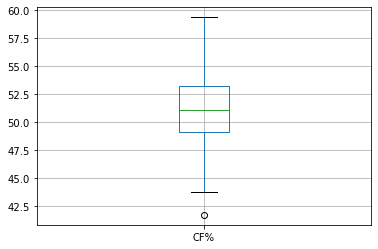

In [215]:
SabresBefore.boxplot('CF%')

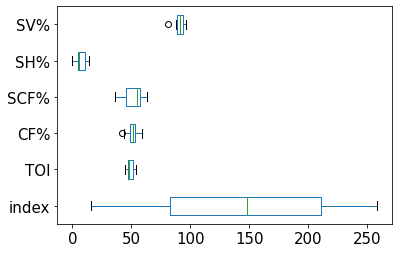

In [230]:
boxplot = SabresBefore.boxplot(grid=False, vert=False,fontsize=15)

In [217]:
SabresAfter

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
10,434,"2021-02-15 - Islanders 3, Sabres 1",Buffalo Sabres,51.266667,44.05,37.93,0.00,92.00
11,448,"2021-02-16 - Islanders 3, Sabres 0",Buffalo Sabres,49.116667,57.14,54.76,0.00,89.47
12,472,"2021-02-18 - Sabres 1, Capitals 3",Buffalo Sabres,68.200000,48.78,44.74,0.00,94.12
13,506,"2021-02-20 - Sabres 3, Devils 2",Buffalo Sabres,52.483333,50.00,52.63,7.41,95.45
14,530,"2021-02-22 - Sabres 2, Islanders 3",Buffalo Sabres,48.950000,48.19,44.68,4.35,90.48
15,546,"2021-02-23 - Sabres 4, Devils 1",Buffalo Sabres,51.433333,47.12,53.06,6.25,100.00
16,568,"2021-02-25 - Devils 4, Sabres 3",Buffalo Sabres,44.933333,40.45,26.67,4.35,93.94
17,600,"2021-02-27 - Flyers 3, Sabres 0",Buffalo Sabres,49.100000,45.98,50.00,0.00,90.32
18,622,"2021-02-28 - Flyers 3, Sabres 0",Buffalo Sabres,49.016667,44.30,40.00,0.00,90.32
19,654,"2021-03-02 - Sabres 2, Rangers 3",Buffalo Sabres,52.650000,63.22,60.00,10.53,82.35


In [219]:
SabresAfter.describe().T

,count,mean,std,min,25%,50%,75%,max
index,10.0,538.000,74.296702,434.000000,480.5000,538.000000,592.000000,654.00
TOI,10.0,51.715,6.218314,44.933333,49.0375,50.191667,52.220833,68.20
CF%,10.0,48.923,6.687160,40.450000,44.7200,47.655000,49.695000,63.22
SCF%,10.0,46.447,9.767542,26.670000,41.1700,47.370000,52.952500,60.00
SH%,10.0,3.289,3.866110,0.000000,0.0000,2.175000,5.775000,10.53
SV%,10.0,91.845,4.611566,82.350000,90.3200,91.240000,94.075000,100.00


<AxesSubplot:>

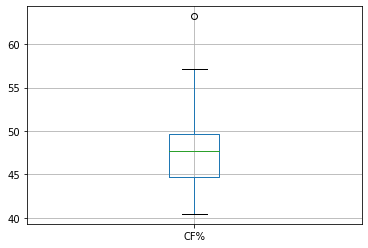

In [221]:
SabresAfter.boxplot('CF%')

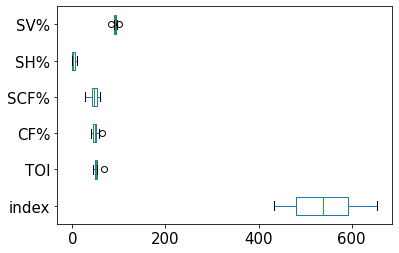

In [231]:
boxplot = SabresAfter.boxplot(grid=False, vert=False,fontsize=15)

In [ ]:
# Can notice already that there is more variation in the data before comoared to after. Possible reasons for this could be 
# playing a more strcutred game when coming back from the outbreak. SV% decreased.

In [222]:
CanucksBefore

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
0,717,"2021-03-06 - Maple Leafs 2, Canucks 4",Vancouver Canucks,54.316667,42.48,41.51,8.00,94.59
1,745,"2021-03-08 - Canadiens 1, Canucks 2",Vancouver Canucks,51.166667,39.58,40.00,0.00,100.00
2,773,"2021-03-10 - Canadiens 5, Canucks 1",Vancouver Canucks,45.133333,34.69,24.00,0.00,89.19
3,825,"2021-03-13 - Oilers 1, Canucks 2",Vancouver Canucks,50.100000,46.81,41.03,5.00,100.00
4,855,"2021-03-15 - Canucks 3, Senators 2",Vancouver Canucks,47.183333,40.35,40.32,7.69,97.62
5,885,"2021-03-17 - Canucks 3, Senators 2",Vancouver Canucks,52.000000,38.68,37.50,7.69,92.31
6,915,"2021-03-19 - Canucks 3, Canadiens 2",Vancouver Canucks,50.000000,46.15,42.86,8.00,100.00
7,929,"2021-03-20 - Canucks 4, Canadiens 5",Vancouver Canucks,56.850000,32.04,22.92,23.08,91.18
8,968,"2021-03-22 - Jets 4, Canucks 0",Vancouver Canucks,56.000000,47.79,42.86,0.00,85.71
9,988,"2021-03-24 - Jets 5, Canucks 1",Vancouver Canucks,48.766667,62.11,62.22,3.13,91.30


In [223]:
CanucksBefore.describe().T

,count,mean,std,min,25%,50%,75%,max
index,10.0,860.000000,93.661328,717.000000,786.0000,870.000000,925.5000,988.00
TOI,10.0,51.151667,3.753562,45.133333,49.0750,50.633333,53.7375,56.85
CF%,10.0,43.068000,8.428510,32.040000,38.9050,41.415000,46.6450,62.11
SCF%,10.0,39.522000,10.879249,22.920000,38.1250,40.675000,42.5225,62.22
SH%,10.0,6.259000,6.847584,0.000000,0.7825,6.345000,7.9225,23.08
SV%,10.0,94.190000,5.066779,85.710000,91.2100,93.450000,99.4050,100.00


<AxesSubplot:>

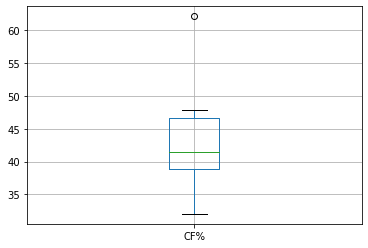

In [224]:
CanucksBefore.boxplot('CF%')

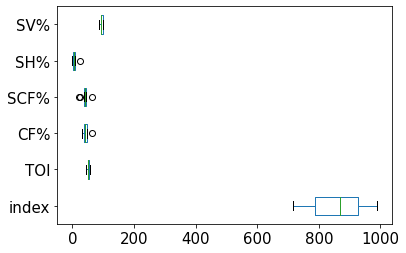

In [232]:
boxplot = CanucksBefore.boxplot(grid=False, vert=False,fontsize=15)

In [225]:
CanucksAfter

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%
10,1363,"2021-04-18 - Maple Leafs 2, Canucks 3",Vancouver Canucks,48.766667,35.87,33.33,12.50,96.77
11,1395,"2021-04-20 - Maple Leafs 3, Canucks 6",Vancouver Canucks,50.133333,50.53,45.83,16.00,96.97
12,1425,"2021-04-22 - Senators 3, Canucks 0",Vancouver Canucks,43.600000,59.26,55.00,0.00,100.00
13,1455,"2021-04-24 - Senators 2, Canucks 4",Vancouver Canucks,41.166667,42.53,32.43,8.70,88.89
14,1473,"2021-04-26 - Canucks 1, Senators 2",Vancouver Canucks,53.983333,44.05,30.00,4.55,91.67
15,1505,"2021-04-28 - Canucks 3, Senators 6",Vancouver Canucks,48.933333,40.22,28.95,16.67,81.48
16,1517,"2021-04-29 - Canucks 1, Maple Leafs 4",Vancouver Canucks,54.233333,42.55,40.00,0.00,83.33
17,1547,"2021-05-01 - Canucks 1, Maple Leafs 5",Vancouver Canucks,53.716667,52.27,48.98,4.35,86.21
18,1595,"2021-05-03 - Oilers 5, Canucks 3",Vancouver Canucks,53.500000,40.20,37.25,10.00,87.10
19,1609,"2021-05-04 - Oilers 4, Canucks 1",Vancouver Canucks,49.416667,48.28,42.86,4.55,90.48


In [229]:
CanucksAfter.describe().T


,count,mean,std,min,25%,50%,75%,max
index,10.0,1488.400,81.823930,1363.000000,1432.500000,1489.000,1539.5000,1609.000000
TOI,10.0,49.745,4.487094,41.166667,48.808333,49.775,53.6625,54.233333
CF%,10.0,45.576,6.963981,35.870000,40.797500,43.300,49.9675,59.260000
SCF%,10.0,39.463,8.669128,28.950000,32.655000,38.625,45.0875,55.000000
SH%,10.0,7.732,6.039851,0.000000,4.400000,6.625,11.8750,16.670000
SV%,10.0,90.290,6.125335,81.480000,86.432500,89.685,95.4950,100.000000


<AxesSubplot:>

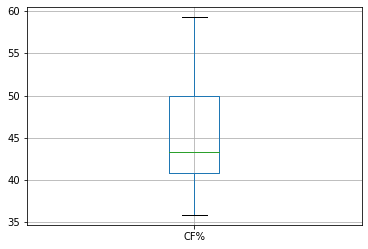

In [227]:
CanucksAfter.boxplot('CF%')

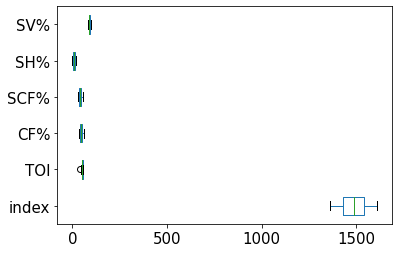

In [233]:
boxplot = CanucksAfter.boxplot(grid=False, vert=False,fontsize=15)